In [3]:
import requests
import re
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
typ= {"marketing", "sales","finanse","inzynieria","hr"}
doswiadczenie = {"doswiadczenie_staz-junior", "doswiadczenie_specjalista-mid", "doswiadczenie_starszy-specjalista-senior", "doswiadczenie_manager-c-level"}

In [5]:
def price_range_to_integers(price):
    return int(price.replace(" ",""))

dictionary = {}
dictionary2 = {}

for typPracy in typ:
    dictionary2 = {}

    for dosw in doswiadczenie:
        page = requests.get(("https://rocketjobs.pl/wszystkie-lokalizacje/{}/{}/widelki_tak").format(typPracy,dosw))
        soup = BeautifulSoup(page.content, 'html5lib')
        offers = soup.find_all(class_='MuiBox-root css-6vg4fr')

        job_offers = []

        for offer in offers:
            job_name = offer.find('h2', class_='css-g9dzcj').get_text()
            price_range = re.findall(r'\d+\s\d+', offer.find(class_='css-lz8wxo').get_text())
            price_low = price_range_to_integers(price_range[0])

            try:
                price_up = price_range_to_integers(price_range[1])
            except IndexError:
                price_up =  price_range_to_integers(price_range[0])

            job_offers.append([price_low,price_up])
        value2 = [pd.DataFrame(job_offers)[0].mean(),pd.DataFrame(job_offers)[1].mean()]
        dictionary2[dosw] = value2
    dictionary[typPracy] = dictionary2

In [6]:
print(dictionary['finanse'])
print(dictionary['inzynieria'])

{'doswiadczenie_staz-junior': [4920.0, 6410.0], 'doswiadczenie_manager-c-level': [9200.0, 11066.666666666666], 'doswiadczenie_specjalista-mid': [7177.419354838709, 9241.935483870968], 'doswiadczenie_starszy-specjalista-senior': [10000.0, 14500.0]}
{'doswiadczenie_staz-junior': [4700.0, 7500.0], 'doswiadczenie_manager-c-level': [12000.0, 17000.0], 'doswiadczenie_specjalista-mid': [6987.096774193548, 10980.645161290322], 'doswiadczenie_starszy-specjalista-senior': [6675.0, 9025.0]}


In [7]:
for job in dictionary.keys():
    print(job)
    print(dictionary[job])

finanse
{'doswiadczenie_staz-junior': [4920.0, 6410.0], 'doswiadczenie_manager-c-level': [9200.0, 11066.666666666666], 'doswiadczenie_specjalista-mid': [7177.419354838709, 9241.935483870968], 'doswiadczenie_starszy-specjalista-senior': [10000.0, 14500.0]}
sales
{'doswiadczenie_staz-junior': [3924.242424242424, 6068.181818181818], 'doswiadczenie_manager-c-level': [9050.0, 15850.0], 'doswiadczenie_specjalista-mid': [6546.878787878788, 10686.474747474747], 'doswiadczenie_starszy-specjalista-senior': [8977.666666666666, 13488.666666666666]}
inzynieria
{'doswiadczenie_staz-junior': [4700.0, 7500.0], 'doswiadczenie_manager-c-level': [12000.0, 17000.0], 'doswiadczenie_specjalista-mid': [6987.096774193548, 10980.645161290322], 'doswiadczenie_starszy-specjalista-senior': [6675.0, 9025.0]}
hr
{'doswiadczenie_staz-junior': [3969.0476190476193, 5609.523809523809], 'doswiadczenie_manager-c-level': [16000.0, 18000.0], 'doswiadczenie_specjalista-mid': [6541.666666666667, 9711.166666666666], 'doswiadc

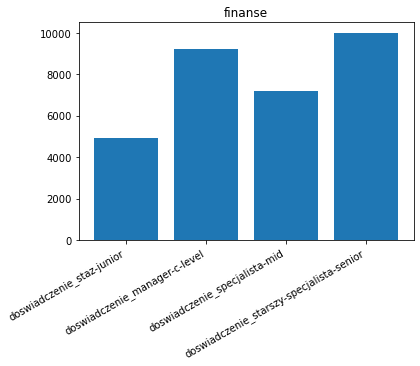

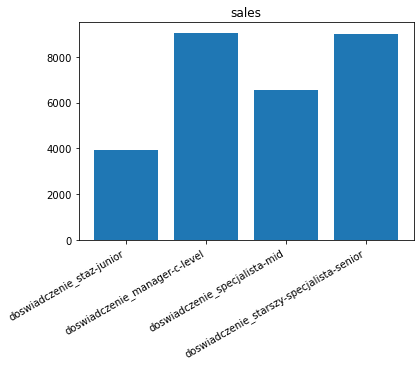

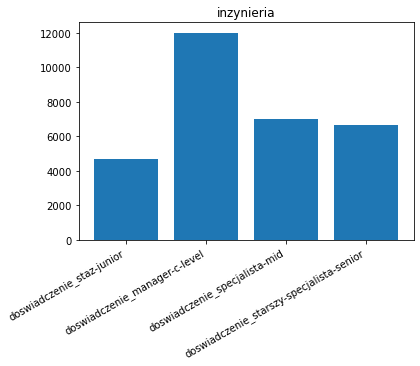

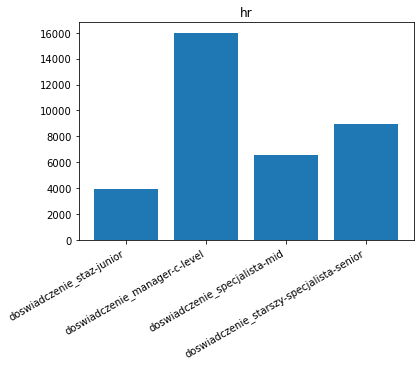

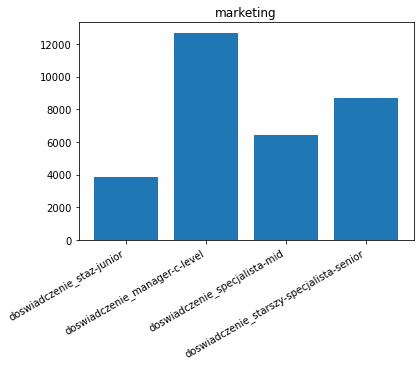

In [8]:

for jobName in dictionary.keys():
    fig, ax = plt.subplots()
    plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
    tempDict = dictionary[jobName]
    fruits = []
    counts = []
    for exp in tempDict.keys():
        fruits.append(exp)
        counts.append(tempDict[exp][0])

    ax.bar(fruits, counts)

    ax.set_title(jobName)

    plt.show()